# Explore here

In [37]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                     

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
df = df[df['Insulin']<=600] 

In [42]:

# Conseguir columnas con valores cero y cuenta de ceros en cada columna. Tambien, Columnas con valores cero y la cantidad de ceros en cada columna
ceros = (df == 0).sum()

ceros[ceros > 0]

#EDA

Pregnancies      110
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          498
dtype: int64

In [43]:
column_means = df.replace(0, pd.NA).mean()
column_means

#Media excluyendo ceros

Pregnancies                   4.500763
Glucose                     121.442105
BloodPressure                 72.40137
SkinThickness                29.139405
Insulin                     150.936061
BMI                          32.428647
DiabetesPedigreeFunction      0.469604
Age                          33.223529
Outcome                            1.0
dtype: object

In [44]:
df = df.mask(df == 0, df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA).mean(), axis=1)
df

#Substitucion de valores 0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,150.936061,33.6,0.627,50,1
1,1,85,66,29,150.936061,26.6,0.351,31,NaN
2,8,183,64,29.139405,150.936061,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,NaN
4,NaN,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NaN
764,2,122,70,27,150.936061,36.8,0.340,27,NaN
765,5,121,72,23,112,26.2,0.245,30,NaN
766,1,126,60,29.139405,150.936061,30.1,0.349,47,1


In [45]:
# Reinsercion de 0'

df = df.fillna(0)
df

/tmp/ipykernel_534/3291735931.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,150.936061,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,150.936061,26.6,0.351,31,0
2,8,183.0,64.0,29.139405,150.936061,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,150.936061,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.139405,150.936061,30.1,0.349,47,1


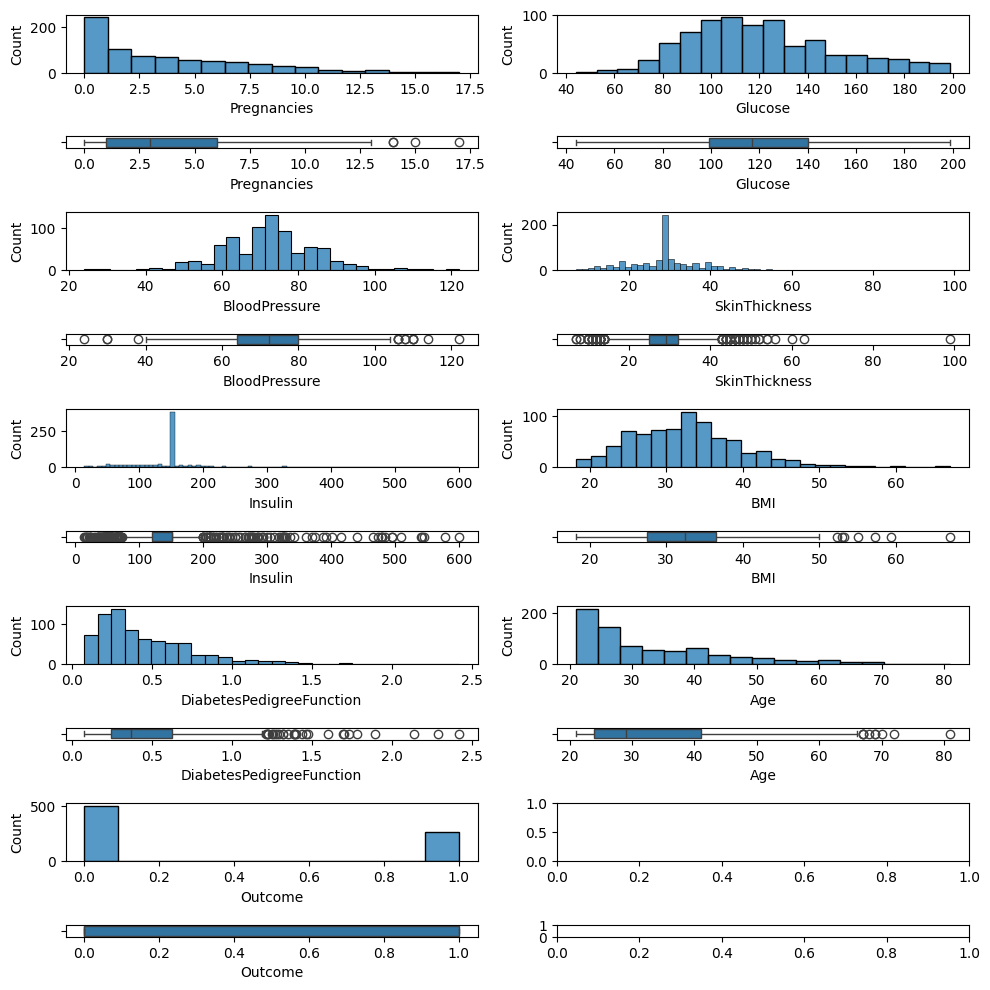

In [46]:

from Feroz import analisis_numerico_numerico
analisis_numerico_numerico(df,'Outcome')
#Análisis univariante

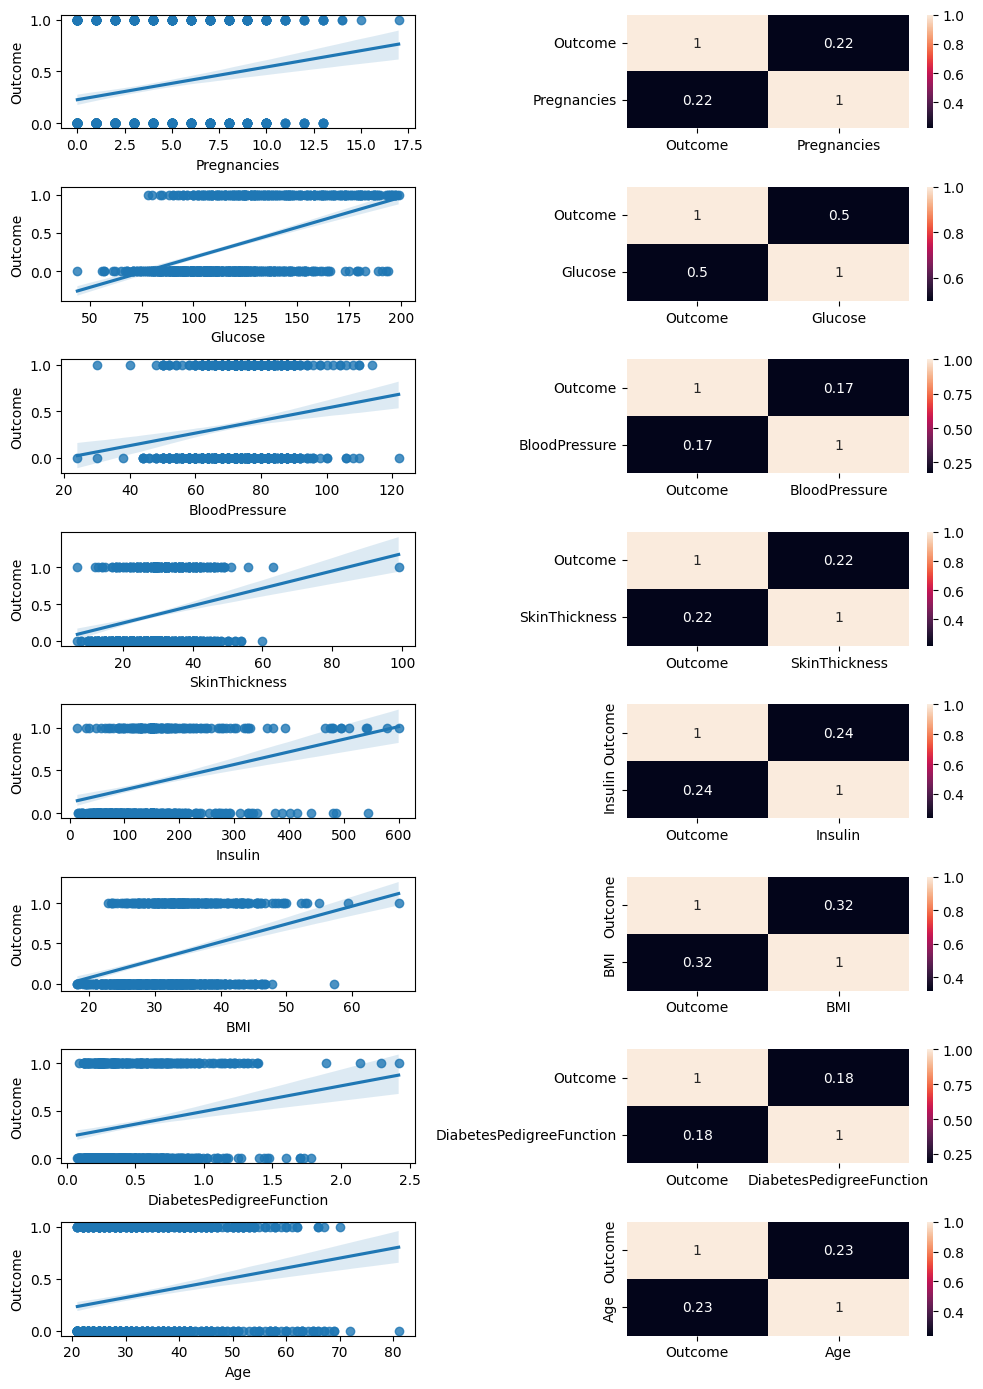

In [47]:
fig, axis = plt.subplots(8, 2, figsize=(10, 14))

sns.regplot(ax=axis[0, 0], data=df, x='Pregnancies', y='Outcome')
sns.heatmap(df[['Outcome', 'Pregnancies']].corr(), ax=axis[0, 1], annot=True)
sns.regplot(ax=axis[1, 0], data=df, x='Glucose', y='Outcome')
sns.heatmap(df[['Outcome', 'Glucose']].corr(), ax=axis[1, 1], annot=True)
sns.regplot(ax=axis[2, 0], data=df, x='BloodPressure', y='Outcome')
sns.heatmap(df[['Outcome', 'BloodPressure']].corr(), ax=axis[2, 1], annot=True)
sns.regplot(ax=axis[3, 0], data=df, x='SkinThickness', y='Outcome')
sns.heatmap(df[['Outcome', 'SkinThickness']].corr(), ax=axis[3, 1], annot=True)
sns.regplot(ax=axis[4, 0], data=df, x='Insulin', y='Outcome')
sns.heatmap(df[['Outcome', 'Insulin']].corr(), ax=axis[4, 1], annot=True)
sns.regplot(ax=axis[5, 0], data=df, x='BMI', y='Outcome')
sns.heatmap(df[['Outcome', 'BMI']].corr(), ax=axis[5, 1], annot=True)
sns.regplot(ax=axis[6, 0], data=df, x='DiabetesPedigreeFunction', y='Outcome')
sns.heatmap(df[['Outcome', 'DiabetesPedigreeFunction']].corr(), ax=axis[6, 1], annot=True)
sns.regplot(ax=axis[7, 0], data=df, x='Age', y='Outcome')
sns.heatmap(df[['Outcome', 'Age']].corr(), ax=axis[7, 1], annot=True)

plt.tight_layout()
plt.show()

#Analisis multivariante

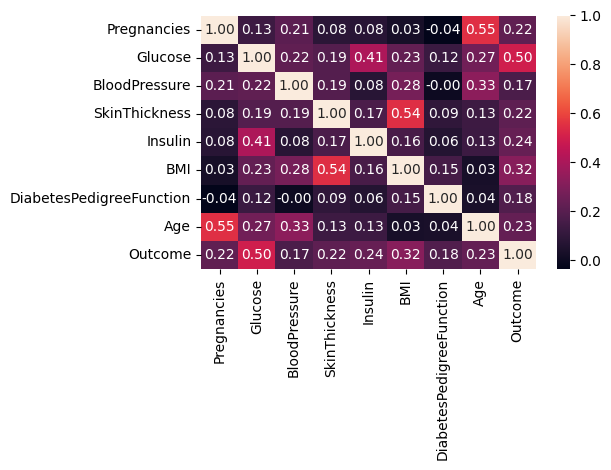

In [48]:
sns.heatmap(df.corr(), annot=True,fmt='.2f')
plt.tight_layout()
plt.show()
#Heatmap

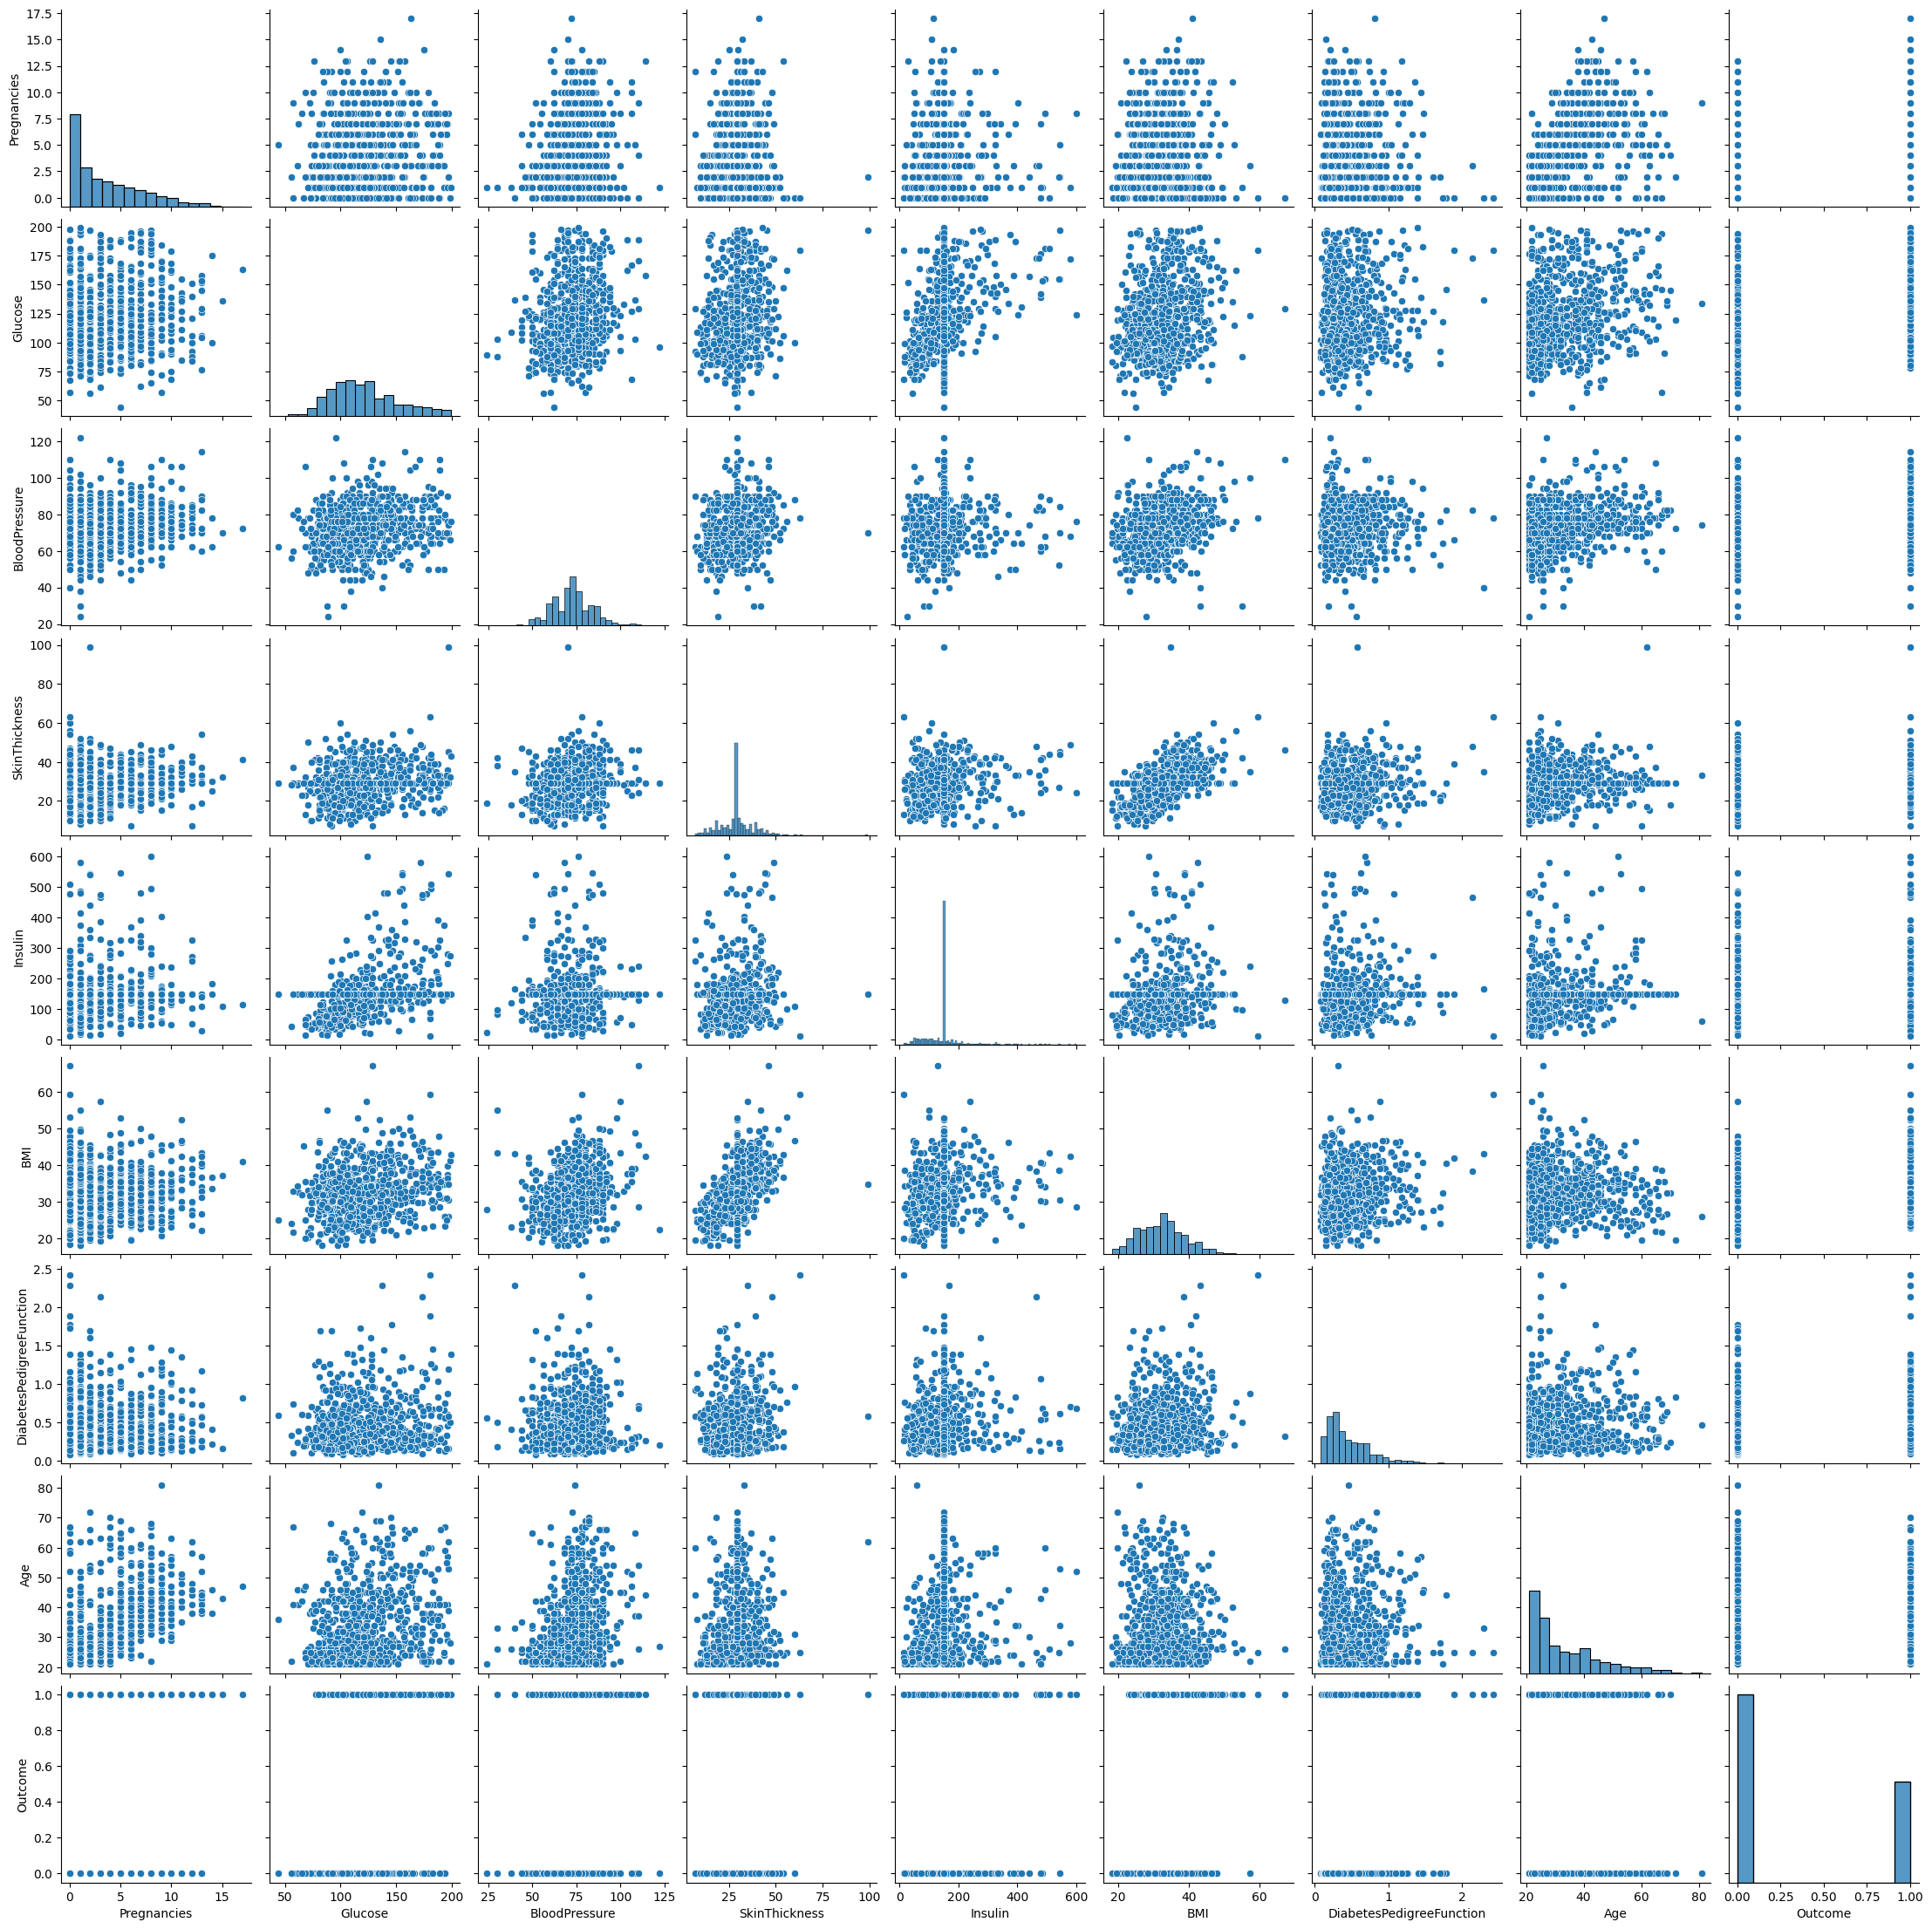

In [49]:
sns.pairplot(data=df)
plt.tight_layout
plt.show()

#Graficos

In [50]:
from Feroz import analisis_ric

analisis_ric(df=df)

columna: Pregnancies limites superior 13.5 e inferior -6.5
columna: Glucose limites superior 201.5 e inferior 37.5
columna: BloodPressure limites superior 104.0 e inferior 40.0
columna: SkinThickness limites superior 42.5 e inferior 14.5
columna: Insulin limites superior 197.34015345268546 e inferior 73.59590792838873
columna: BMI limites superior 50.0 e inferior 14.0
columna: DiabetesPedigreeFunction limites superior 1.2005 e inferior -0.3315
columna: Age limites superior 66.5 e inferior -1.5
columna: Outcome limites superior 2.5 e inferior -1.5


In [51]:
df = df[(df['Pregnancies'] >= 0) & (df['Pregnancies'] <= 13.5)]
df = df[(df['Glucose'] >= 37.5) & (df['Glucose'] <= 201.5)]
df = df[(df['BloodPressure'] >= 40) & (df['BloodPressure'] <= 104)]
df = df[(df['SkinThickness'] >= 14.5) & (df['SkinThickness'] <= 42.5)]
df = df[(df['Insulin'] >= 73.59590792838873) & (df['Insulin'] <= 197.34015345268546)]
df = df[(df['BMI'] >= 14) & (df['BMI'] <= 50.0)]
df = df[(df['DiabetesPedigreeFunction'] >= 0) & (df['DiabetesPedigreeFunction'] <= 1.2005)]
df = df[(df['Age'] >= 0) & (df['Age'] <= 66.5)]

#Retirar valores innecesarios

In [52]:
df.shape

(504, 9)

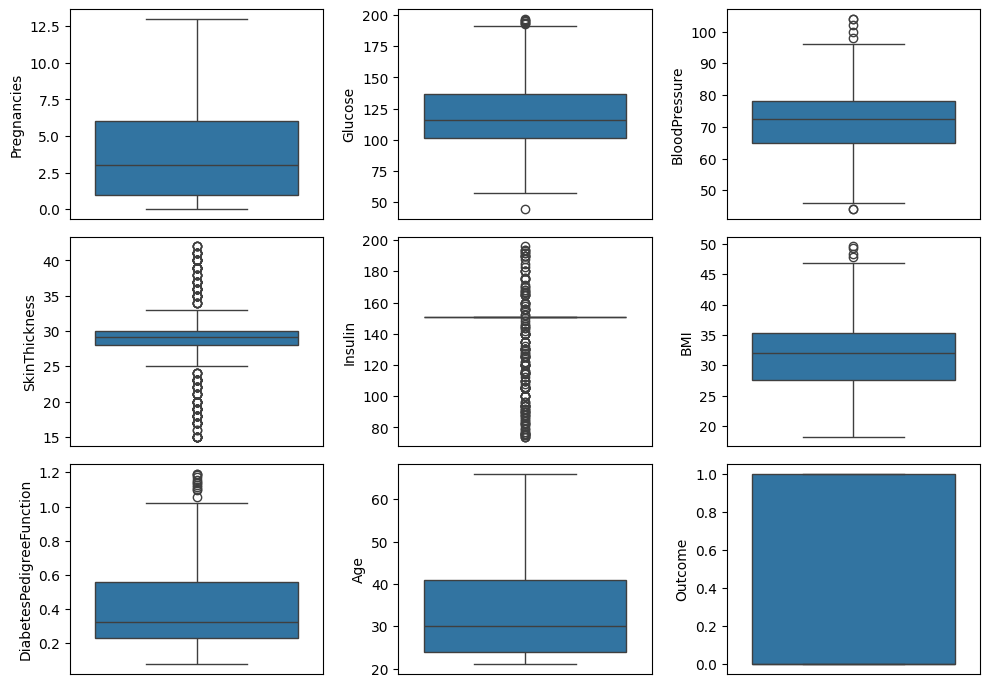

In [67]:
from Feroz import analisis_boxplot
analisis_boxplot(df,'Outcome')

# Sin valores innecesarios

In [68]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
117,5,78.0,48.00000,29.139405,150.936061,33.7,0.654,25
688,1,140.0,74.00000,26.000000,180.000000,24.1,0.828,23
22,7,196.0,90.00000,29.139405,150.936061,39.8,0.451,41
508,2,84.0,50.00000,23.000000,76.000000,30.4,0.968,21
604,4,183.0,72.40137,29.139405,150.936061,28.4,0.212,36


In [54]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

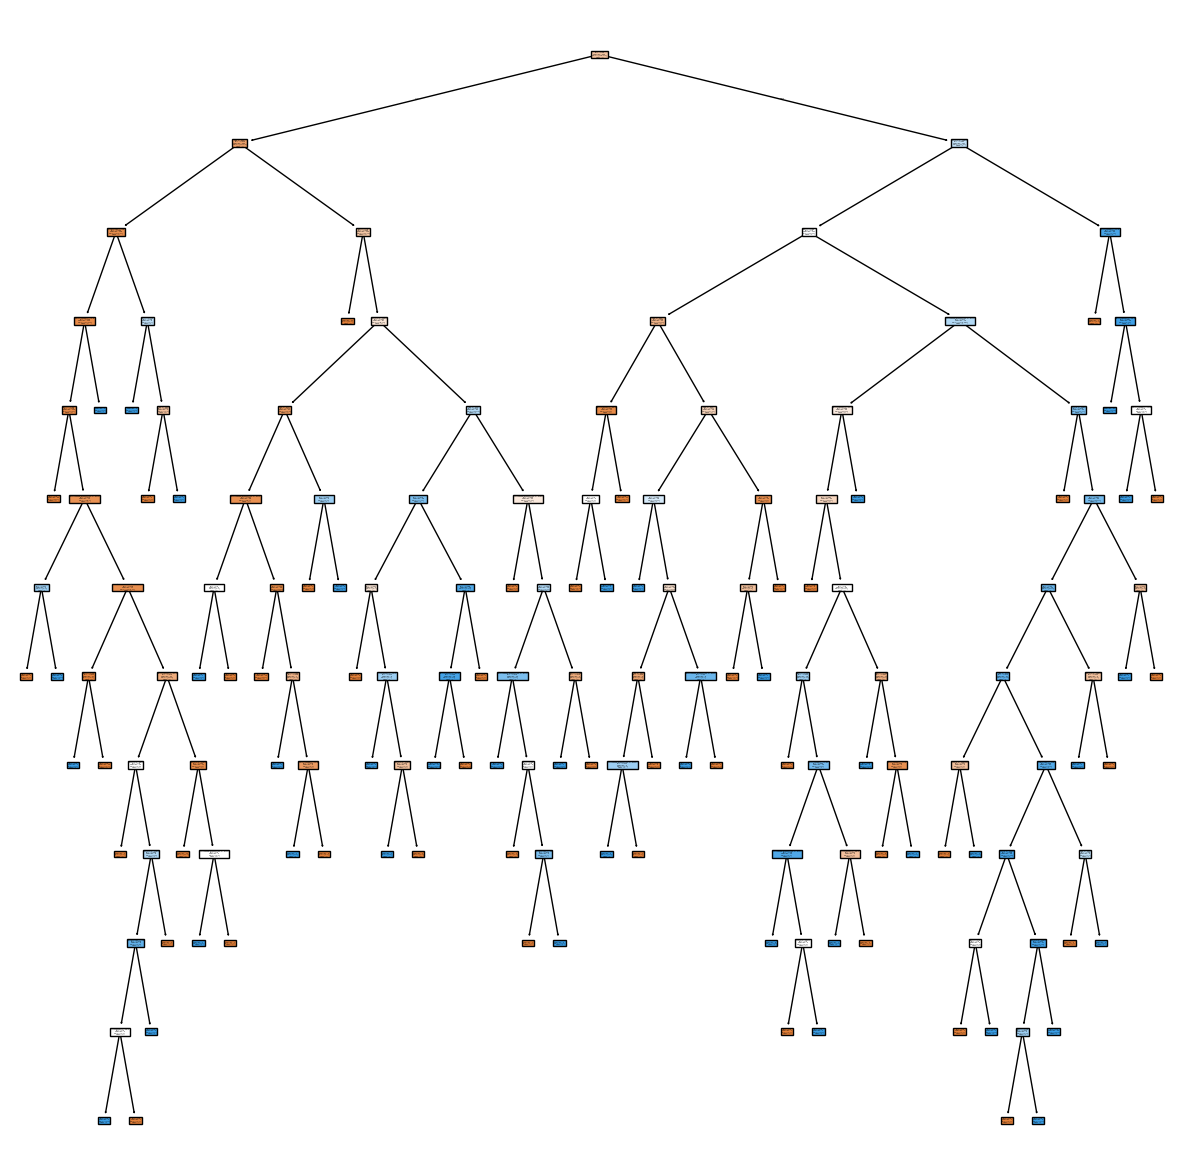

In [55]:
from sklearn import tree 

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ['0','1','2'], filled = True)

plt.show()

In [56]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.693069306930693

In [58]:
model1 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model2= DecisionTreeClassifier(random_state=42,criterion='log_loss')

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

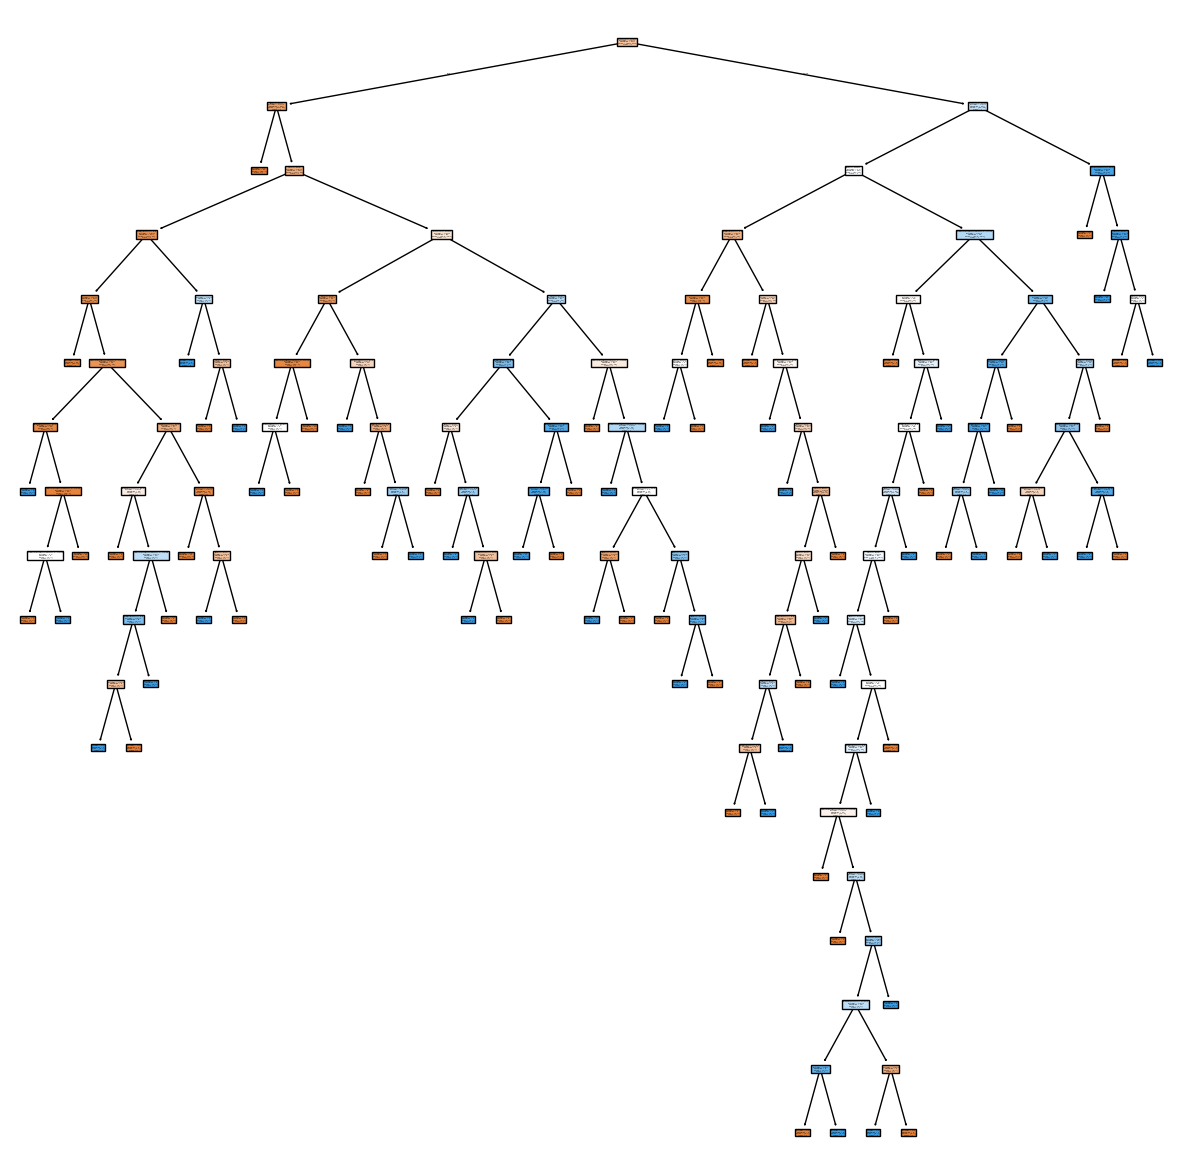

In [69]:
from sklearn import tree 

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model1, feature_names = list(X_train.columns), class_names = ['0','1','2'], filled = True)

plt.show()

#Ver cambio de Arbol

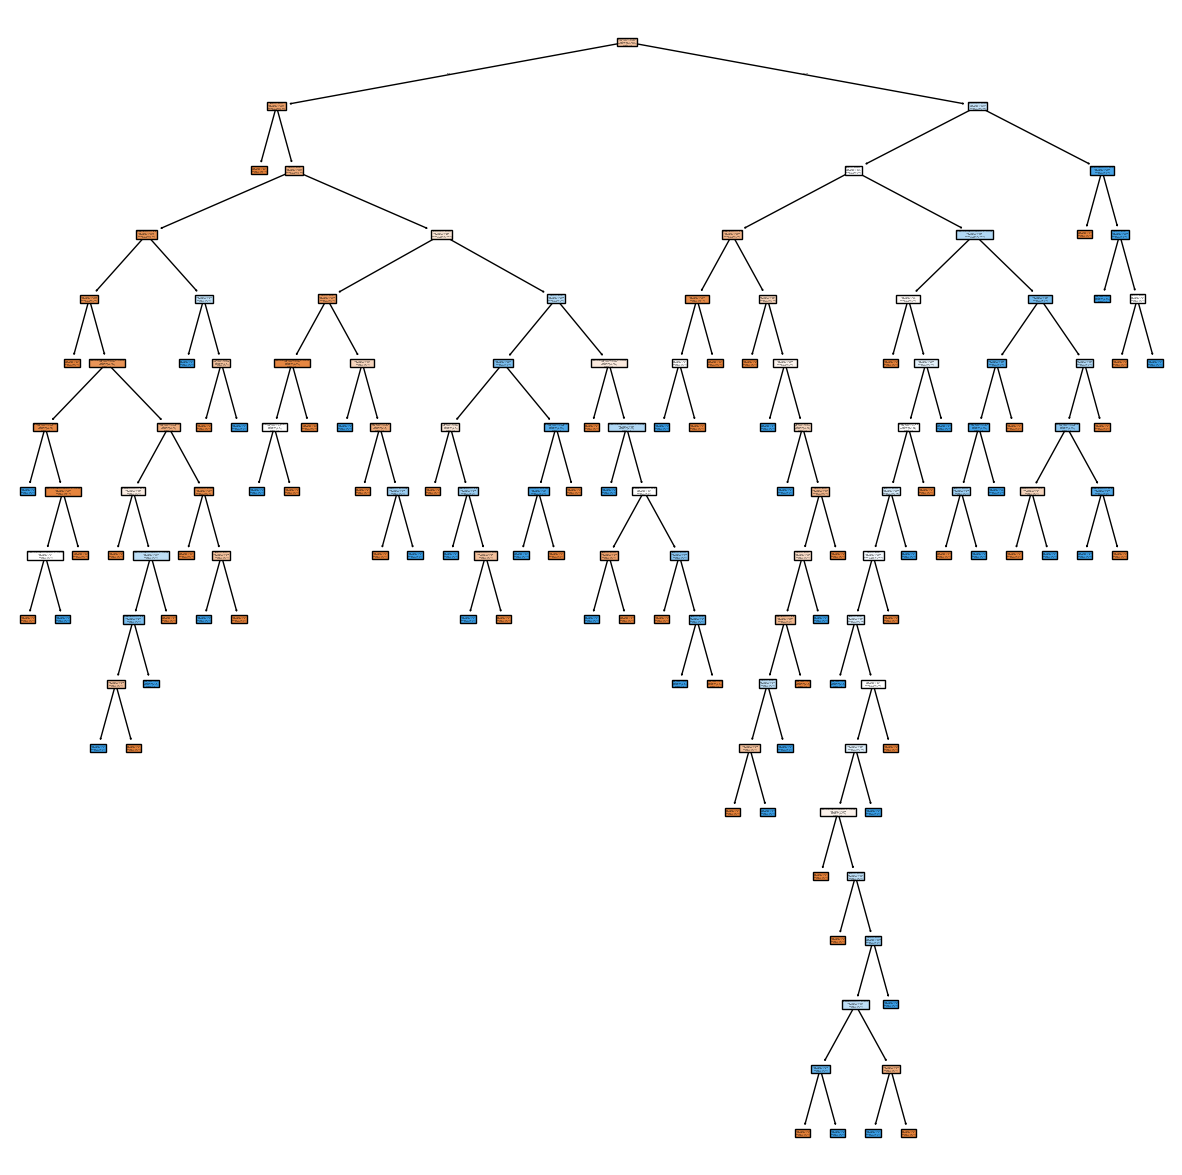

In [60]:
from sklearn import tree 

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model2, feature_names = list(X_train.columns), class_names = ['0','1','2'], filled = True)

plt.show()

In [61]:
y_pred_entropy = model1.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy))

y_pred_log_loss = model2.predict(X_test)
print(accuracy_score(y_test,y_pred_log_loss))

0.6534653465346535
0.6534653465346535


In [ ]:
DecisionTreeClassifier

grid = {
    'criterion' : ['gini','log_loss','entropy'],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [1,2,4,6,8],
    'max_features' : ['auto','sqrt','log2',2,3,4,5]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model,grid)
clf.fit(X_train,y_train)

best_model = clf.best_estimator_

print(clf.best_params_)
print(clf.best_score_)

#Grilla

{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2}
0.7468518518518519


/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [71]:
model.feature_importances_
print(X_train.columns)

#Se ve el orden de importancia

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


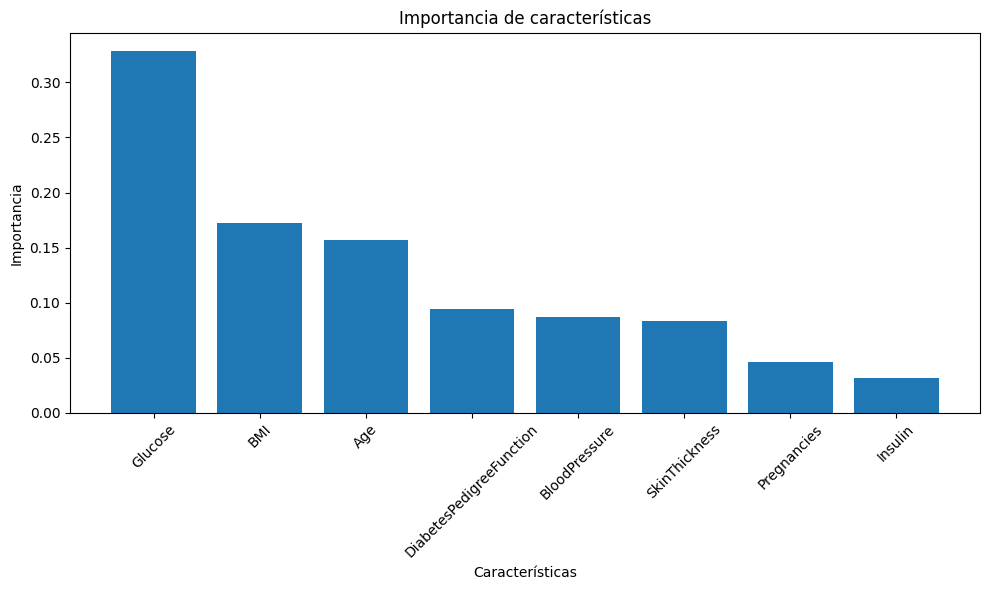

In [72]:
importancia = pd.DataFrame({
    'caracteristica': X_train.columns,
    'importancia': model.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importancia['caracteristica'], importancia['importancia'])
plt.xticks(rotation=45)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características')
plt.tight_layout()
plt.show()

In [74]:
from pickle import dump
dump(best_model,open('../models/decision_tree_clasiffier_42_log_loss_max_features_5_min_samples_leaf_8_min_samples_split_2.model','wb'))